(32561, 123) (32561, 1)
(16281, 123) (16281, 1)
NAG_loss = 0.998937
RMSProp_loss = 0.988409
AdaDelta_loss = 0.996722
Adam_loss = 0.996335

NAG_loss = 0.997424
RMSProp_loss = 0.980130
AdaDelta_loss = 0.993423
Adam_loss = 0.992672

NAG_loss = 0.995528
RMSProp_loss = 0.973349
AdaDelta_loss = 0.990167
Adam_loss = 0.989018

NAG_loss = 0.993281
RMSProp_loss = 0.967333
AdaDelta_loss = 0.986908
Adam_loss = 0.985372

NAG_loss = 0.990706
RMSProp_loss = 0.961764
AdaDelta_loss = 0.983614
Adam_loss = 0.981732

NAG_loss = 0.987787
RMSProp_loss = 0.956322
AdaDelta_loss = 0.980164
Adam_loss = 0.978084

NAG_loss = 0.984630
RMSProp_loss = 0.951428
AdaDelta_loss = 0.976846
Adam_loss = 0.974441

NAG_loss = 0.981195
RMSProp_loss = 0.946562
AdaDelta_loss = 0.973404
Adam_loss = 0.970795

NAG_loss = 0.977597
RMSProp_loss = 0.942165
AdaDelta_loss = 0.970153
Adam_loss = 0.967162

NAG_loss = 0.973817
RMSProp_loss = 0.937878
AdaDelta_loss = 0.966891
Adam_loss = 0.963538

NAG_loss = 0.969868
RMSProp_loss = 0.93365

Adam_loss = 0.701770

NAG_loss = 0.586818
RMSProp_loss = 0.663404
AdaDelta_loss = 0.721341
Adam_loss = 0.698863

NAG_loss = 0.582449
RMSProp_loss = 0.660121
AdaDelta_loss = 0.718469
Adam_loss = 0.695952

NAG_loss = 0.578111
RMSProp_loss = 0.657095
AdaDelta_loss = 0.715721
Adam_loss = 0.693051

NAG_loss = 0.573771
RMSProp_loss = 0.653993
AdaDelta_loss = 0.712922
Adam_loss = 0.690157

NAG_loss = 0.569441
RMSProp_loss = 0.650680
AdaDelta_loss = 0.710074
Adam_loss = 0.687259

NAG_loss = 0.565144
RMSProp_loss = 0.647585
AdaDelta_loss = 0.707349
Adam_loss = 0.684373

NAG_loss = 0.560837
RMSProp_loss = 0.644355
AdaDelta_loss = 0.704538
Adam_loss = 0.681489

NAG_loss = 0.556587
RMSProp_loss = 0.641540
AdaDelta_loss = 0.701899
Adam_loss = 0.678628

NAG_loss = 0.552346
RMSProp_loss = 0.638522
AdaDelta_loss = 0.699132
Adam_loss = 0.675774

NAG_loss = 0.548188
RMSProp_loss = 0.635532
AdaDelta_loss = 0.696406
Adam_loss = 0.672930

NAG_loss = 0.544115
RMSProp_loss = 0.632555
AdaDelta_loss = 0.693702

RMSProp_loss = 0.483985
AdaDelta_loss = 0.498860
Adam_loss = 0.487177

NAG_loss = 0.480772
RMSProp_loss = 0.483625
AdaDelta_loss = 0.497895
Adam_loss = 0.486743

NAG_loss = 0.480758
RMSProp_loss = 0.483880
AdaDelta_loss = 0.497191
Adam_loss = 0.486362

NAG_loss = 0.480741
RMSProp_loss = 0.483664
AdaDelta_loss = 0.496395
Adam_loss = 0.486019

NAG_loss = 0.480711
RMSProp_loss = 0.483125
AdaDelta_loss = 0.495525
Adam_loss = 0.485703

NAG_loss = 0.480680
RMSProp_loss = 0.482865
AdaDelta_loss = 0.494706
Adam_loss = 0.485411

NAG_loss = 0.480654
RMSProp_loss = 0.482853
AdaDelta_loss = 0.494057
Adam_loss = 0.485147

NAG_loss = 0.480627
RMSProp_loss = 0.482764
AdaDelta_loss = 0.493447
Adam_loss = 0.484910

NAG_loss = 0.480599
RMSProp_loss = 0.482760
AdaDelta_loss = 0.492874
Adam_loss = 0.484702

NAG_loss = 0.480564
RMSProp_loss = 0.482248
AdaDelta_loss = 0.492216
Adam_loss = 0.484507

NAG_loss = 0.480533
RMSProp_loss = 0.482408
AdaDelta_loss = 0.491781
Adam_loss = 0.484338

NAG_loss = 0.480506

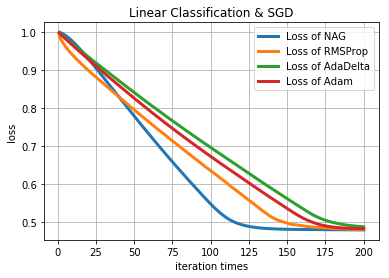

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_svmlight_file
import random


def loadDataSet():
    # 读取数据
    train_data = load_svmlight_file('D:\machine learning\experiment\lab_2\\a9a.txt')
    X_train = np.reshape(train_data[0].todense().data, (train_data[0].shape[0], train_data[0].shape[1]))
    y_train = np.reshape(train_data[1].data, (train_data[1].shape[0], 1))

    validation_data = load_svmlight_file('D:\machine learning\experiment\lab_2\\a9a(testing).txt')
    zeros = np.zeros(validation_data[0].shape[0])
    X_validation = np.reshape(validation_data[0].todense().data, (validation_data[0].shape[0], validation_data[0].shape[1]))
    X_validation = np.column_stack((X_validation, zeros))
    y_validation = np.reshape(validation_data[1].data, (validation_data[1].shape[0], 1))

    print(X_train.shape,y_train.shape)
    print(X_validation.shape,y_validation.shape)
    return X_train, y_train, X_validation, y_validation


def loss_function(X_data, y_data, w, C):
    hinge_loss = 0
    losses = (1 - y_data * np.dot(X_data, w))
    for one_loss in losses:
        hinge_loss += C * max(0, one_loss)
    return hinge_loss / len(X_data)


def compute_gradient(X_data, y_data, w, C):
    gradient = np.zeros((1, X_data.shape[1]))
    losses = (1 - y_data * np.dot(X_data, w))
    for i, loss in enumerate(losses):
        if loss <= 0:
            gradient += w.T
        else:
            gradient += w.T - C * y_data[i] * X_data[i]
    return gradient / len(X_data)


#NAG
def NAG(w, gradient, v, mu=0.9, eta=0.0003):
    v_prev = v
    v = mu * v + eta * gradient
    w += ( mu * v_prev - (1 + mu) * v).reshape((123, 1))
    return w, v


#RMSProp
def RMSProp(parameters, gradients, G, eta=.01, gamma=0.9, epsilon=1e-8):
    cache = decay_rate * cache + (1 - decay_rate) * (gradient ** 2)
    w += (- eta * gradient / (np.sqrt(cache + eps))).reshape((123, 1))
    return w, cache


#AdaDelta
def AdaDelta(w, gradient, cache, delta_t, r=0.95, eps=1e-8):
    cache = r * cache + (1 - r) * (gradient ** 2)
    delta_theta = - np.sqrt(delta_t + eps) / np.sqrt(cache + eps) * gradient
    w = w + delta_theta.reshape((123, 1))
    delta_t = r * delta_t + (1 - r) * (delta_theta ** 2)
    return w, cache, delta_t


#Adam
def Adam(w, gradient, m, i, t, beta1=0.9, beta2=0.999, eta=0.0005, eps=1e-8):
    m = beta1 * m + (1 - beta1) * gradient
    mt = m / (1 - beta1 ** i)
    t = beta2 * t + (1 - beta2) * (gradient ** 2)
    vt = t / (1 - beta2 ** i)
    w += (-eta * mt / (np.sqrt(vt + eps))).reshape((123, 1))
    return w, m, t

def plotLossPerTime(epoch, nag_losses, rms_losses, adad_losses, adam_losses):
    plt.xlabel('iteration times')
    plt.ylabel('loss')
    plt.title('Linear Classification & SGD')
    n_cycles = range(1,epoch+1)
    plt.plot(n_cycles, nag_losses, label="Loss of NAG", linewidth=3)
    plt.plot(n_cycles, rms_losses, label="Loss of RMSProp", linewidth=3)
    plt.plot(n_cycles, adad_losses, label="Loss of AdaDelta", linewidth=3)
    plt.plot(n_cycles, adam_losses, label="Loss of Adam", linewidth=3)
    plt.legend(loc=0)
    plt.grid()
    plt.show()

X_train, y_train, X_validation, y_validation = loadDataSet()
nag_w = np.zeros((X_train.shape[1], 1))
rms_w = np.zeros((X_train.shape[1], 1))
adad_w = np.zeros((X_train.shape[1], 1))
adam_w = np.zeros((X_train.shape[1], 1))

v = np.zeros(X_train.shape[1])
cache = np.zeros(X_train.shape[1])
adad_cache = np.zeros(X_train.shape[1])
delta_t = np.zeros(X_train.shape[1])
m = np.zeros(X_train.shape[1])
t = np.zeros(X_train.shape[1])

batch_size = 5000
epoch = 200
C = 1
nag_losses = []
rms_losses = []
adad_losses = []
adam_losses = []

for i in range(epoch):
    index = list(range(len(X_train)))
    random.shuffle(index)

    # NAG
    nag_gradient = compute_gradient(X_train[index][:batch_size], y_train[index][:batch_size], nag_w, C)
    nag_w, v = NAG(nag_w, nag_gradient, v)
    nag_loss = loss_function(X_validation, y_validation, nag_w, C)
    nag_losses.append(nag_loss)
    print("NAG_loss = %f" % nag_loss)

    # RMSProp
    rms_gradient = compute_gradient(X_train[index][:batch_size], y_train[index][:batch_size], rms_w, C)
    rms_w, cache = RMSProp(rms_w, rms_gradient, cache)
    rms_loss = loss_function(X_validation, y_validation, rms_w, C)
    rms_losses.append(rms_loss)
    print("RMSProp_loss = %f" % rms_loss)

    # AdaDelta
    adad_gradient = compute_gradient(X_train[index][:batch_size], y_train[index][:batch_size], adad_w, C)
    adad_w, adad_cache, delta_t = AdaDelta(adad_w, adad_gradient, adad_cache, delta_t)
    adad_loss = loss_function(X_validation, y_validation, adad_w, C)
    adad_losses.append(adad_loss)
    print("AdaDelta_loss = %f" % adad_loss)

    # Adam
    adam_gradient = compute_gradient(X_train[index][:batch_size], y_train[index][:batch_size], adam_w, C)
    adam_w, m, t = Adam(adam_w, adam_gradient, m, i+1, t)
    adam_loss = loss_function(X_validation, y_validation, adam_w, C)
    adam_losses.append(adam_loss)
    print("Adam_loss = %f" % adam_loss)

    print()

plotLossPerTime(epoch, nag_losses, rms_losses, adad_losses, adam_losses)